In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
symptoms_data = pd.read_csv('./data/symtoms_df.csv')
training_data = pd.read_csv('./data/Training.csv')

In [3]:
label_encoder = LabelEncoder()
training_data['prognosis'] = label_encoder.fit_transform(training_data['prognosis'])

In [4]:
X = training_data.drop(columns=['prognosis'])
y = training_data['prognosis']

In [5]:
print(y.value_counts())

prognosis
15    120
20    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
21    120
19    120
4     120
40    120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
27    120
Name: count, dtype: int64


In [6]:
# Use oversampling or class weights based on distribution
class_weights = {i: len(y) / (len(np.unique(y)) * count) for i, count in enumerate(y.value_counts())}

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# Convert to categorical
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Luthfi Hanif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(X_train, y_train_cat,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    class_weight=class_weights,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                    verbose=1)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2389 - loss: 3.3365 - val_accuracy: 0.9492 - val_loss: 1.3832
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8925 - loss: 1.0819 - val_accuracy: 1.0000 - val_loss: 0.1185
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9676 - loss: 0.2550 - val_accuracy: 1.0000 - val_loss: 0.0253
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.1261 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9935 - loss: 0.0744 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9955 - loss: 0.0454 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9960 - loss: 0.0393 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9961 - loss: 0.0292 - val_accuracy: 1.0000 - val_loss:

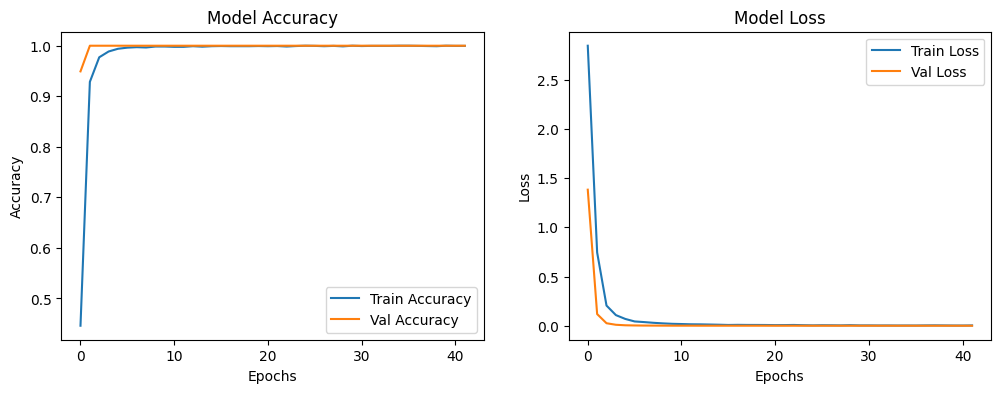

In [11]:
# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [12]:
# Evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.

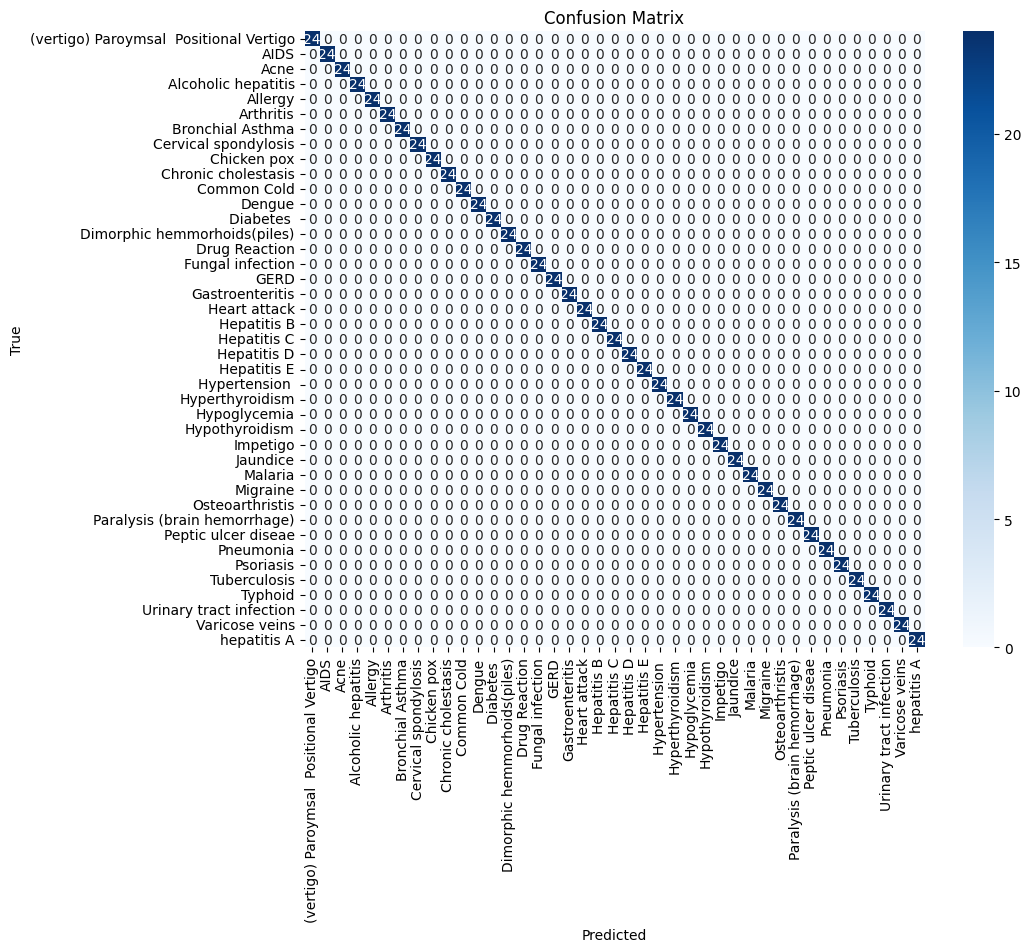

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Prediction Function
def predict_disease(symptoms_input):
    input_data = np.zeros((1, X_train.shape[1]))
    for symptom in symptoms_input:
        if symptom in X.columns:
            input_data[0, X.columns.get_loc(symptom)] = 1
    probabilities = model.predict(input_data)[0]
    predictions = {label_encoder.inverse_transform([i])[0]: prob for i, prob in enumerate(probabilities)}
    sorted_predictions = dict(sorted(predictions.items(), key=lambda item: item[1], reverse=True))
    return sorted_predictions

In [18]:
# Prediction
user_input = ['joint_pain', 'neck_pain', 'knee_pain', 'hip_joint_pain']
prediction = predict_disease(user_input)
print("Predictions:", prediction)

prediction_output = pd.DataFrame(list(prediction.items()), columns=['Diseases', 'Probability'])
prediction_output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predictions: {'Osteoarthristis': 0.9999695, 'Cervical spondylosis': 1.9924231e-05, 'Dengue': 1.5060401e-06, 'Hypoglycemia': 1.2231206e-06, 'Dimorphic hemmorhoids(piles)': 1.0730467e-06, 'Arthritis': 9.969546e-07, 'hepatitis A': 8.047095e-07, 'Psoriasis': 6.257613e-07, 'Hypertension ': 5.094991e-07, 'Urinary tract infection': 5.027797e-07, 'Typhoid': 4.766978e-07, 'Hepatitis E': 3.9635202e-07, 'Pneumonia': 3.5215191e-07, 'Jaundice': 2.4172823e-07, 'Hepatitis B': 2.3379087e-07, 'Hepatitis D': 2.267771e-07, 'Hypothyroidism': 1.8364813e-07, 'Malaria': 1.8350177e-07, 'Chronic cholestasis': 1.7144322e-07, 'Bronchial Asthma': 1.6629464e-07, 'Tuberculosis': 1.5728253e-07, 'Gastroenteritis': 1.3163371e-07, 'Allergy': 1.2547648e-07, 'Common Cold': 6.7719306e-08, 'Chicken pox': 6.503937e-08, '(vertigo) Paroymsal  Positional Vertigo': 6.1970866e-08, 'Acne': 4.672572e-08, 'Drug Reaction': 3.5383756e-08, 'Alcoholic hepatitis': 2.0250008e-08, 'Hepatitis C': 8.091

,Diseases,Probability
0,Osteoarthristis,9.999695e-01
1,Cervical spondylosis,1.992423e-05
2,Dengue,1.506040e-06
3,Hypoglycemia,1.223121e-06
4,Dimorphic hemmorhoids(piles),1.073047e-06
5,Arthritis,9.969546e-07
6,hepatitis A,8.047095e-07
7,Psoriasis,6.257613e-07
8,Hypertension,5.094991e-07
9,Urinary tract infection,5.027797e-07
